In [ ]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
print(df.columns)

Index(['ID', 'fec_not', 'semana', 'año', 'edad_', 'uni_med_', 'sexo_',
       'cod_pais_o', 'cod_dpto_o', 'cod_mun_o', 'area_', 'ocupacion_',
       'tip_ss_', 'cod_ase_', 'gp_discapa', 'gp_desplaz', 'gp_migrant',
       'gp_carcela', 'gp_gestan', 'gp_calle', 'gp_psiquia', 'gp_vic_vio',
       'fecha_contagio', 'inicio_sintomas', 'pac_hos_', 'fec_hos_',
       'condicion_final', 'fecha_defuncion', 'fecha_nacimiento',
       'certif_defuncion', 'familiar_sintomas', 'fiebre', 'cefalea',
       'dolor_retroocular', 'mialgias', 'artralgia', 'erupcion',
       'dolor_abdomen', 'vomito', 'diarrea', 'somnolencia', 'hipotension',
       'hepatomegalia', 'hemorragia_mucosa', 'hipotermia', 'caida_plaquetas',
       'acum_liquido', 'aum_hematocrito', 'conducta', 'latitud', 'longitud'],
      dtype='object')


In [ ]:
df['sexo_'].replace({'H': 0, 'M': 1}, inplace=True)
print(df['sexo_'])

0       1
1       0
2       0
3       1
4       1
       ..
1257    1
1258    0
1259    0
1260    1
1261    0
Name: sexo_, Length: 1262, dtype: int64


In [ ]:
import numpy as np

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


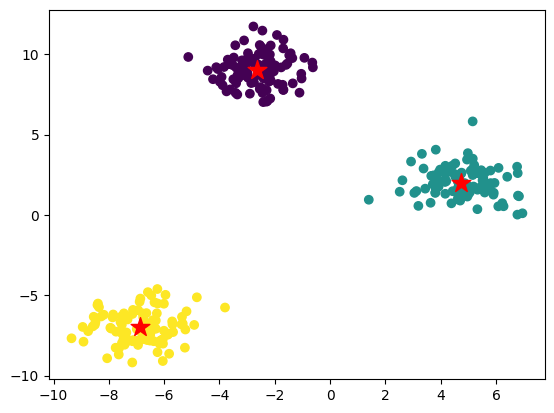

In [ ]:
# Generar puntos de datos
X, y = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='r')
plt.show()

In [ ]:
features = df
centers = np.random.rand(3, 2) * 20
features, true_labels = make_blobs(
  n_samples=200,
  centers=centers,
  cluster_std=2.75,
  random_state=42
)

In [ ]:
features[:10]

array([[13.52467872,  5.49702672],
       [ 9.13800171, 10.18137233],
       [13.69752848,  8.73123232],
       [18.13711983, 13.36216493],
       [ 7.69538294, 14.9032478 ],
       [12.18435019, 10.25618269],
       [ 7.26669912, 15.18586112],
       [ 5.0981169 , 18.92429056],
       [ 5.28671236, 20.67322111],
       [ 6.23963472, 20.4161948 ]])

In [ ]:
true_labels

array([0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0,
       0, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0,
       0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0,
       0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2,
       1, 1])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:10]

array([[ 0.41284159, -1.89957865],
       [-0.41195634, -0.91557753],
       [ 0.44534139, -1.22019626],
       [ 1.28008846, -0.24741515],
       [-0.68320243,  0.07630718],
       [ 0.16082846, -0.89986274],
       [-0.76380502,  0.13567339],
       [-1.17154923,  0.92097385],
       [-1.13608887,  1.288357  ],
       [-0.95691717,  1.23436564]])

In [ ]:
kmeans = KMeans(
  init=centroids,
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [ ]:
kmeans = KMeans(n_clusters=3, init=centroids, n_init=1)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init=array([[ 4.74710337,  2.01059427],
       [-6.88387179, -6.98398415],
       [-2.63323268,  9.04356978]]),
       n_clusters=3, n_init=1)

In [ ]:
kmeans.inertia_

102.70147916317478

In [ ]:
kmeans.cluster_centers_

array([[ 1.26337343,  0.21565289],
       [-0.80155125,  0.90243685],
       [-0.35713955, -1.11550404]])

In [ ]:
kmeans.n_iter_

8

In [ ]:
kmeans.labels_

array([2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2,
       2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0,
       1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0,
       1, 1], dtype=int32)

In [ ]:
kmeans_kwargs = {
  "init": "k-means++",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

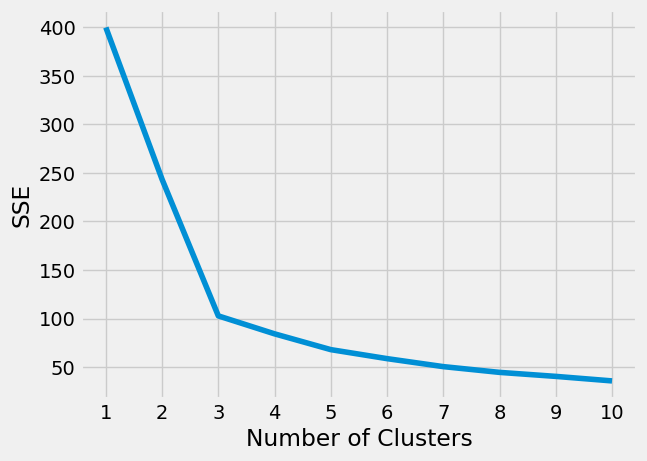

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

3

In [ ]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

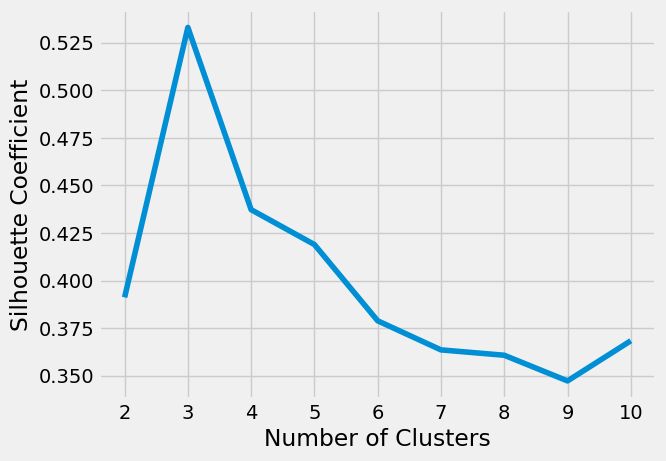

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()